In [4]:
from importlib import reload
import PirsonFunction as PF
import matplotlib.pyplot as plt

In [5]:
PF = reload(PF)

In [7]:
Sw = float(input('Wetting phase (Water) Saturation : '))
Snw = float(input('Non-Wetting phase Saturation     : '))
Swc = float(input('Connate Water Saturation         : '))

Wetting phase (Water) Saturation :  0.5
Non-Wetting phase Saturation     :  0.5
Connate Water Saturation         :  0.2


### Wetting phase

In [8]:
krw = PF.wet_phase(Sw = Sw, Swc = Swc)
print(f'Krw : {krw:.3f}')

Krw : 0.077


### Non-Wetting Phase |  Imbibition

In [9]:
krnw_imb = PF.imbibition_nw(Snw, Sw, Swc)

In [10]:
print(f'Krw  : {krw:.3f}\n\
Krnw : {krnw_imb:.3f}')

Krw  : 0.077
Krnw : 0.000


In [14]:
S = [i/100 for i in range(0, 100)]
S_nw = [i/100 for i in range(0, 100)]
S_w = [i/100 for i in range(100, 0, -1)]

In [15]:
kr_imb = [PF.imbibition_nw(Snw = S_nw[i] - Swc, Sw = S_w[i], Swc = Swc) for i in range(0, 100)]
kr_w = [PF.wet_phase(Sw = S_w[i], Swc = Swc) for i in range(0, 100)]

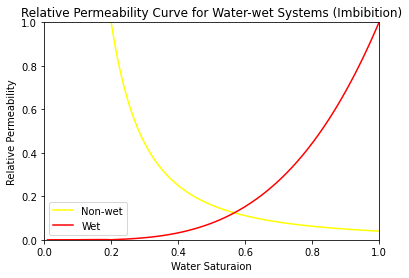

In [16]:
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot(S_w, kr_imb, color = 'yellow', label = 'Non-wet')
plt.plot(S_w, kr_w, color = 'red', label = 'Wet')
plt.legend()
plt.xlabel('Water Saturaion')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curve for Water-wet Systems (Imbibition)')
plt.show()
# Note : Connate Water saturation (Swc) is constant.

### Non-Wetting Phase | Drainage

In [17]:
krnw_drg = PF.drainage_nw(Sw, Swc)

In [18]:
print(f'Krw  : {krw:.3f}\n\
Krnw : {krnw_drg:.3f}')

Krw  : 0.077
Krnw : 0.418


In [19]:
S = [i/100 for i in range(0, 100)]
S_nw = [i/100 for i in range(0, 100)]
S_w = [i/100 for i in range(100, 0, -1)]

In [20]:
kr_dr = [PF.drainage_nw(Sw = S_w[i], Swc = Swc) for i in range(0, 100)]
kr_w = [PF.wet_phase(Sw = S_w[i], Swc = Swc) for i in range(0, 100)]

/mnt/c/Users/Sa'eed/two-phase-relative-permeability-correlations/PirsonFunction.py:13: RuntimeWarning: invalid value encountered in power
  krnw = (1-Sws) * ((1 - np.power(Sws, 0.25) * np.sqrt(Sw)) ** 0.5)


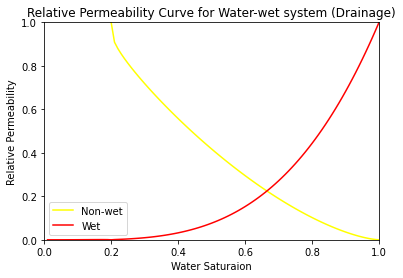

In [21]:
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot(S_w, kr_dr, color = 'yellow', label = 'Non-wet')
plt.plot(S_w, kr_w, color = 'red', label = 'Wet')
plt.legend()
plt.xlabel('Water Saturaion')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curve for Water-wet system (Drainage)')
plt.show()
# Note : Connate Water saturation (Swc) is constant.

### For comparison between Drainage & Imbibition :

__note__ : In Pirson correlation, Kr equation for wetting phase is the same in both imbibition and drainage. Which is ofcourse not true in reality.

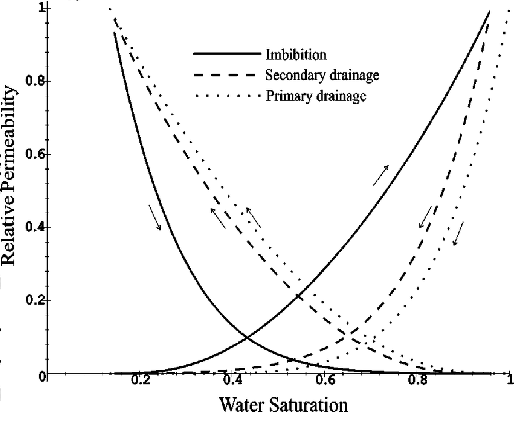